Apply linenear regression to predict the maximum temperature from min temperature 



In [39]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split  
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn import metrics  


data = pd.read_csv("dataset/1_summary_of_weather.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
STA            119040 non-null int64
Date           119040 non-null object
Precip         119040 non-null object
WindGustSpd    532 non-null float64
MaxTemp        119040 non-null float64
MinTemp        119040 non-null float64
MeanTemp       119040 non-null float64
Snowfall       117877 non-null object
PoorWeather    34237 non-null object
YR             119040 non-null int64
MO             119040 non-null int64
DA             119040 non-null int64
PRCP           117108 non-null object
DR             533 non-null float64
SPD            532 non-null float64
MAX            118566 non-null float64
MIN            118572 non-null float64
MEA            118542 non-null float64
SNF            117877 non-null object
SND            5563 non-null float64
FT             0 non-null float64
FB             0 non-null float64
FTI            0 non-null float64
ITH            0 non-null float64

In [42]:
data.head(10)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10001,1942-7-6,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001,1942-7-7,T,NaN,28.333333,22.777778,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10001,1942-7-8,3.556,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10001,1942-7-9,T,NaN,27.222222,22.777778,25.000000,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10001,1942-7-10,3.556,NaN,25.555556,21.666667,23.333333,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
inputs = data[['MinTemp']]
inputs.head()

,MinTemp
0,22.222222
1,21.666667
2,22.222222
3,22.222222
4,21.666667


In [44]:
outputs = data[['MaxTemp']]
outputs.head()

,MaxTemp
0,25.555556
1,28.888889
2,26.111111
3,26.666667
4,26.666667


In [45]:


regr = linear_model.LinearRegression()
regr = regr.fit(inputs, outputs)                                                             
prediction = regr.predict([[1.5]])                                         
print(prediction) 

[[12.07872838]]


In [46]:
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.3) 

regr1 = linear_model.LinearRegression()
regr1 = regr1.fit(X_train, y_train)                 

y_pred = regr1.predict(X_test) 

In [47]:
df = pd.DataFrame({'Actual': pd.DataFrame(y_test.values)[0].values, 'Prediction': pd.DataFrame(y_pred)[0].values})  
df.head() 

,Actual,Prediction
0,35.555556,33.150802
1,30.000000,33.150802
2,26.666667,18.882263
3,30.555556,33.150802
4,30.000000,28.564486


In [48]:
# The coefficients
m=regr1.coef_[0]
b=regr1.intercept_
print('Coefficients: \n', m)
print('Interceft: \n', b)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [0.91726322]
Interceft: 
 [10.72881203]
Mean squared error: 17.24
Variance score: 0.77


In [49]:
regr1.score(X_test, y_test)

0.7749320663168421

In [50]:
reg_line = [(m* float(x)) + b for x in np.array(inputs)]

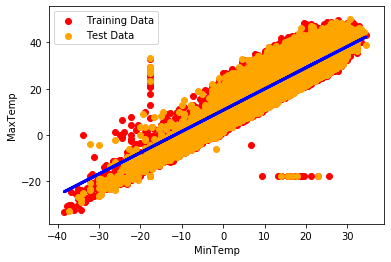

In [51]:
# Plot outputs
plt.scatter(X_train, y_train,  color='red', label="Training Data")
plt.scatter(X_test, y_test,  color='orange', label= "Test Data")
plt.plot(inputs,reg_line, color="blue", linewidth=3)

plt.xlabel("MinTemp")
plt.ylabel("MaxTemp")
plt.legend()
plt.show()

[[29.07407643]]


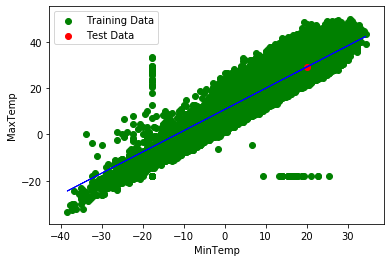

In [52]:
x_now = [[20]]
y_now = regr1.predict(x_now)
print(y_now)
# Plot outputs
plt.plot(inputs,reg_line, color="blue", linewidth=1)
plt.scatter(inputs, outputs, color='green', label="Training Data")
plt.scatter(x_now, y_now,  color='red', label= "Test Data")
plt.xlabel("MinTemp")
plt.ylabel("MaxTemp")
plt.legend()
plt.show()

In [53]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 3.185105217082247
Mean Squared Error: 17.244677296554574
Root Mean Squared Error: 4.152671103826377
